In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
m_data = pd.read_csv(mouse_drug_data_to_load)
ct_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_table = pd.merge(ct_data, m_data, on = "Mouse ID", how = "left")

# Display the data table for preview
data_table.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_volume_mean = data_table.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

tumor_volume_mean = pd.DataFrame(tumor_volume_mean).reset_index()

# Preview DataFrame

tumor_volume_mean


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_volume_stdE = data_table.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

tumor_volume_stdE = pd.DataFrame(tumor_volume_stdE).reset_index()

# Preview DataFrame

tumor_volume_stdE.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [20]:
# Minor Data Munging to Re-Format the Data Frames

tv_vs_time_mean = tumor_volume_mean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

tv_vs_time_stdE = tumor_volume_stdE.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked

tv_vs_time_mean


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
tv_vs_time_mean.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

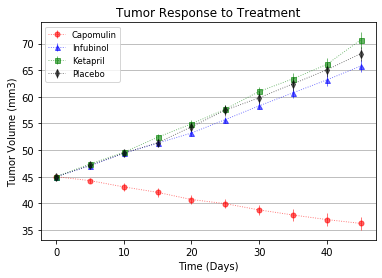

In [6]:
# Generate the Plot (with Error Bars)

drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
errorbar_fmt = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}
fig1, ax1 = plt.subplots()

for drug in drugs:
    ax1.errorbar(tv_vs_time_mean.index, tv_vs_time_mean[drug], tv_vs_time_stdE[drug], 
                 fmt = errorbar_fmt[drug], label = drug, ms = 5, alpha = 0.6, lw = 0.9)
    
ax1.legend(fontsize = "small", loc = "best")
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.grid(True, axis = 'y')

# Save the Figure

plt.savefig("TumorResponse2treatment.png")
plt.show()


## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

met_site_mean = data_table.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame

met_site_mean = pd.DataFrame(met_site_mean)

# Preview DataFrame

met_site_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

met_site_stdE = data_table.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame

met_site_stdE = pd.DataFrame(met_site_stdE)

# Preview DataFrame

met_site_stdE.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
met_site_mean1 = pd.DataFrame(met_site_mean).reset_index()

met_site_stdE1 = pd.DataFrame(met_site_stdE).reset_index()

# Minor Data Munging to Re-Format the Data Frames

ms_vs_time_mean = met_site_mean1.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

ms_vs_time_stdE = met_site_stdE1.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked

ms_vs_time_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


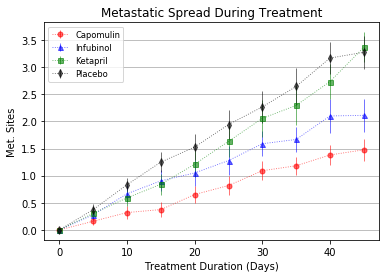

In [11]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()

for drug in drugs:
    ax2.errorbar(ms_vs_time_mean.index, ms_vs_time_mean[drug], ms_vs_time_stdE[drug], 
                 fmt = errorbar_fmt[drug], label = drug, ms = 5, alpha = 0.6, lw = 0.9)
    
ax2.legend(fontsize = "small", loc = "best")
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spread During Treatment')
plt.grid(True, axis = 'y')

# Save the Figure

plt.savefig("MetastaticResponse2treatment.png")
plt.show()


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

sur_rate_count = data_table.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame

sur_rate_count = pd.DataFrame(sur_rate_count).reset_index()
sur_rate_count = sur_rate_count.rename(columns = {"Mouse ID":"Mouse Count"})

# Preview DataFrame

sur_rate_count.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames

sur_rate_by_time = sur_rate_count.pivot(index = "Timepoint", columns = "Drug", values = "Mouse Count")

# Preview the Data Frame

sur_rate_by_time

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [14]:
sur_rate_by_time

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


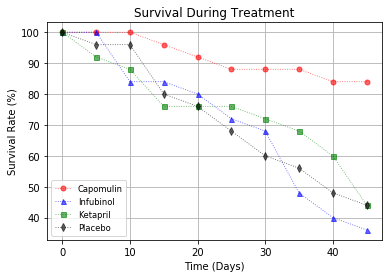

In [15]:
df1 = pd.DataFrame()
for c in sur_rate_by_time.columns:
    df1[c] = 100 * sur_rate_by_time[c]/25

#df1

# Generate the Plot (with Error Bars)

fig3, ax3 = plt.subplots()

for drug in drugs:
    ax3.errorbar(df1.index, df1[drug], 
                 fmt = errorbar_fmt[drug], label = drug, ms = 5, alpha = 0.6, lw = 0.9)
    
ax3.legend(fontsize = "small", loc = "best")
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.grid(True)

# Save the Figure

plt.savefig("SurvivalRates.png")
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug

pct_change_drugs = (tv_vs_time_mean.iloc[9, :] - tv_vs_time_mean.iloc[0,:]) / tv_vs_time_mean.iloc[0,:] * 100


# Display the data to confirm

print(pct_change_drugs)


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


In [28]:
# Store all Relevant Percent Changes into a Tuple

pct_change = pct_change_drugs.to_frame()
pct_change = pct_change.rename(columns = {0 : "percent change"})

# Splice the data between passing and failing drugs

pct_change["Pass"] = (pct_change < 0)
print(pct_change)

           percent change   Pass
Drug                            
Capomulin      -19.475303   True
Ceftamin        42.516492  False
Infubinol       46.123472  False
Ketapril        57.028795  False
Naftisol        53.923347  False
Placebo         51.297960  False
Propriva        47.241175  False
Ramicane       -22.320900   True
Stelasyn        52.085134  False
Zoniferol       46.579751  False


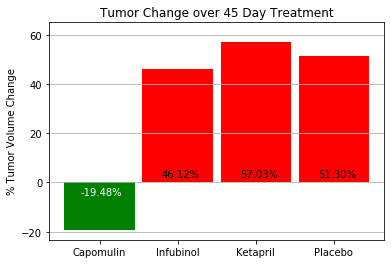

In [29]:
fig4, ax4 = plt.subplots()
x = 0

for drug in drugs:
    y = pct_change.loc[drug, "percent change"]
    if pct_change.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = .9, color = "g")
        plt.text(x-.25, -5, '{:.2f}%'.format(y), color = "white")
    else:
        ax4.bar(drug, y, width = .9, color = "r")
        plt.text(x-.2, 2, '{:.2f}%'.format(y), color = "black")
    x = 1 + x
plt.yticks((-20, 0, 20, 40, 60))
ax4.yaxis.grid()
plt.title("Tumor Change over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.ylim(ymax = 65)

plt.savefig("SummaryBarGraph.png")

plt.show()